# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [6]:
BATCH_SIZE = 64
N_CLASSES = 10
IMG_SIZE = (28, 28)

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True)

Processing...
Done!


Here we can see one of the images.

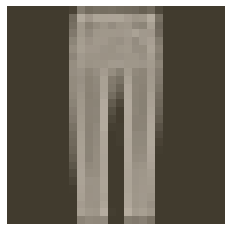

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [41]:
# TODO: Define your network architecture here
from collections import OrderedDict

input_size = IMG_SIZE[0]*IMG_SIZE[1]
hidden_sizes = [128, 64]
output_size = N_CLASSES

model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_sizes[0])),
    ('act1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
    ('act2', nn.ReLU()),
    ('drop2', nn.Dropout(0.2)),
    ('output', nn.Linear(hidden_sizes[1], output_size)) # logits
])
)

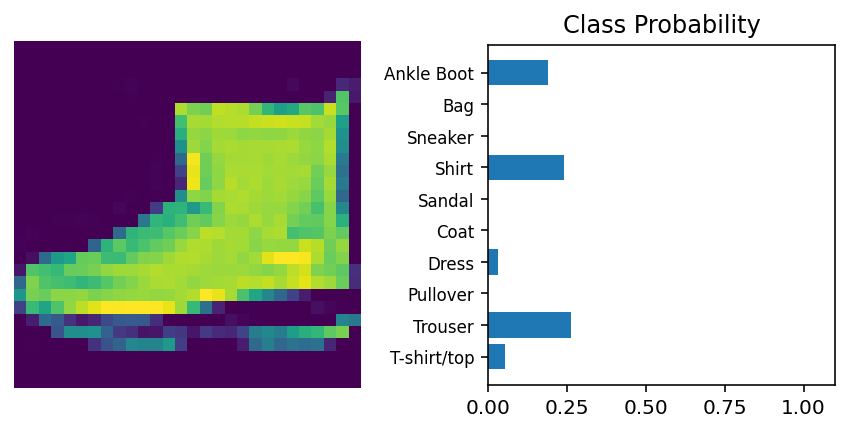

In [42]:
# Test out your network!

dataiter = iter(trainloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, input_size)

# TODO: Calculate the class probabilities (softmax) for img
ps = model.forward(img)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [43]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [57]:
# TODO: Train the network here
N_EPOCHS = 5

def train(model, criterion, optimizer, train_data, n_epochs, input_size,  print_every=40):
    """
    Train loop for Feed-Forward Neural network
    """
    train_loss_hist = []
    for i_epoch in range(n_epochs):
        # epochs loop
        training_loss = 0
        train_iter = iter(train_data)
    
        for i_steps, (Xs, ys) in enumerate(train_iter, start=1):
            # batch loop
            # shape input data
            Xs.resize_(Xs.size()[0], input_size)
            # clean gradients
            optimizer.zero_grad()
            # forward pass
            ps = model.forward(Xs)
            # loss computation
            loss = criterion(ps, ys)
            # backward pass and optimization
            loss.backward()
            optimizer.step()
            # track loss
            training_loss += loss.item()
            # log training
            if i_steps % print_every == 0:
                avg_train_loss = training_loss/print_every
                train_loss_hist.append(avg_train_loss)
                training_loss = 0
                print("Epoch: {}/{}... ".format(i_epoch+1, n_epochs),
                      "Loss: {:.4f}".format(avg_train_loss))
            
    return train_loss_hist
        
        
train_loss_hist1 = train(model, criterion, optimizer, trainloader, 1, input_size,  print_every=40)
    

Epoch: 1/1...  Loss: 0.5659
Epoch: 1/1...  Loss: 0.5442
Epoch: 1/1...  Loss: 0.5328
Epoch: 1/1...  Loss: 0.5488
Epoch: 1/1...  Loss: 0.5136
Epoch: 1/1...  Loss: 0.5256
Epoch: 1/1...  Loss: 0.5411
Epoch: 1/1...  Loss: 0.5242
Epoch: 1/1...  Loss: 0.5262
Epoch: 1/1...  Loss: 0.5163
Epoch: 1/1...  Loss: 0.5251
Epoch: 1/1...  Loss: 0.5208
Epoch: 1/1...  Loss: 0.5277
Epoch: 1/1...  Loss: 0.5130
Epoch: 1/1...  Loss: 0.5181
Epoch: 1/1...  Loss: 0.5213
Epoch: 1/1...  Loss: 0.4996
Epoch: 1/1...  Loss: 0.5365
Epoch: 1/1...  Loss: 0.5130
Epoch: 1/1...  Loss: 0.5098
Epoch: 1/1...  Loss: 0.5376
Epoch: 1/1...  Loss: 0.5274
Epoch: 1/1...  Loss: 0.5288


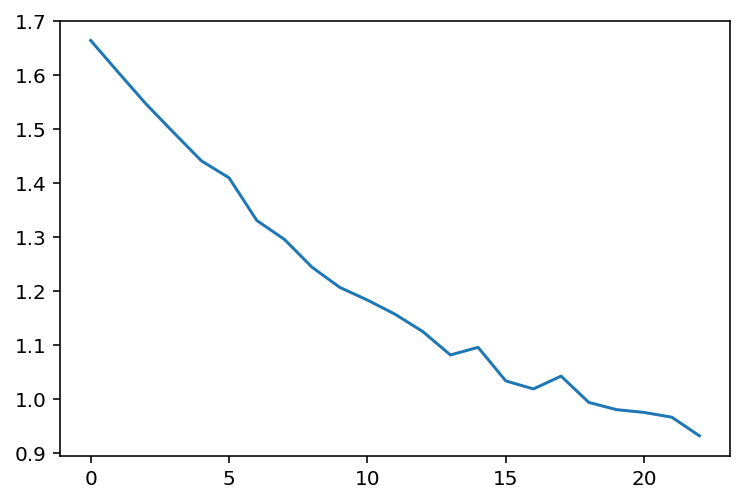

In [46]:
plt.plot(train_loss_hist1)

In [58]:
        
train_loss_hist = train(model, criterion, optimizer, trainloader, N_EPOCHS, input_size,
                        print_every=int(len(trainloader)/4))
    

Epoch: 1/5...  Loss: 0.4987
Epoch: 1/5...  Loss: 0.5161
Epoch: 1/5...  Loss: 0.5180
Epoch: 1/5...  Loss: 0.5144
Epoch: 2/5...  Loss: 0.5050
Epoch: 2/5...  Loss: 0.5093
Epoch: 2/5...  Loss: 0.4990
Epoch: 2/5...  Loss: 0.4955
Epoch: 3/5...  Loss: 0.4970
Epoch: 3/5...  Loss: 0.4967
Epoch: 3/5...  Loss: 0.4859
Epoch: 3/5...  Loss: 0.4883
Epoch: 4/5...  Loss: 0.4842
Epoch: 4/5...  Loss: 0.4863
Epoch: 4/5...  Loss: 0.4787
Epoch: 4/5...  Loss: 0.4802
Epoch: 5/5...  Loss: 0.4711
Epoch: 5/5...  Loss: 0.4790
Epoch: 5/5...  Loss: 0.4669
Epoch: 5/5...  Loss: 0.4755


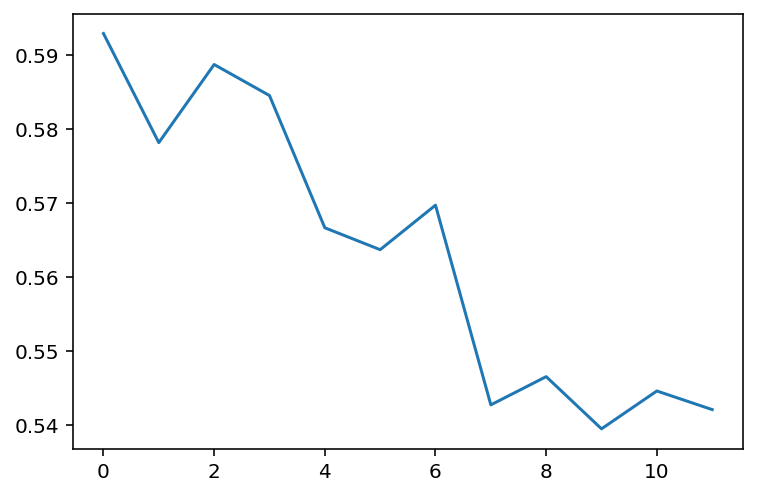

In [54]:
plt.plot(train_loss_hist)

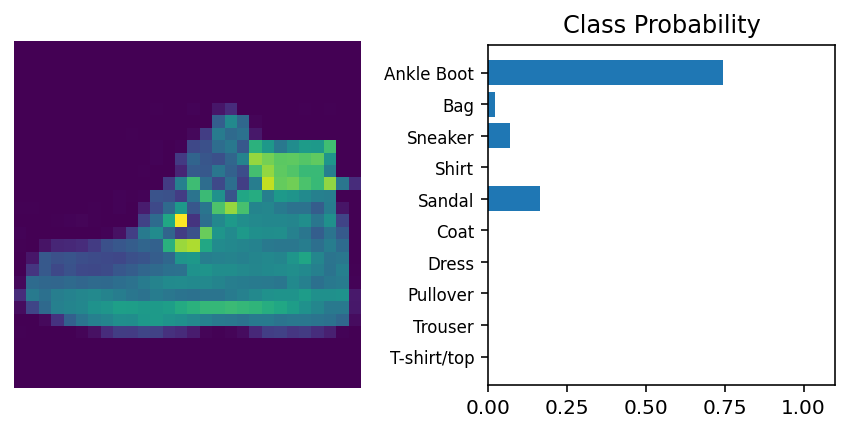

In [56]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, input_size)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logits = model.forward(img)
    
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.